Q. diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']는 0값을 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압),
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes_data = pd.read_csv('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


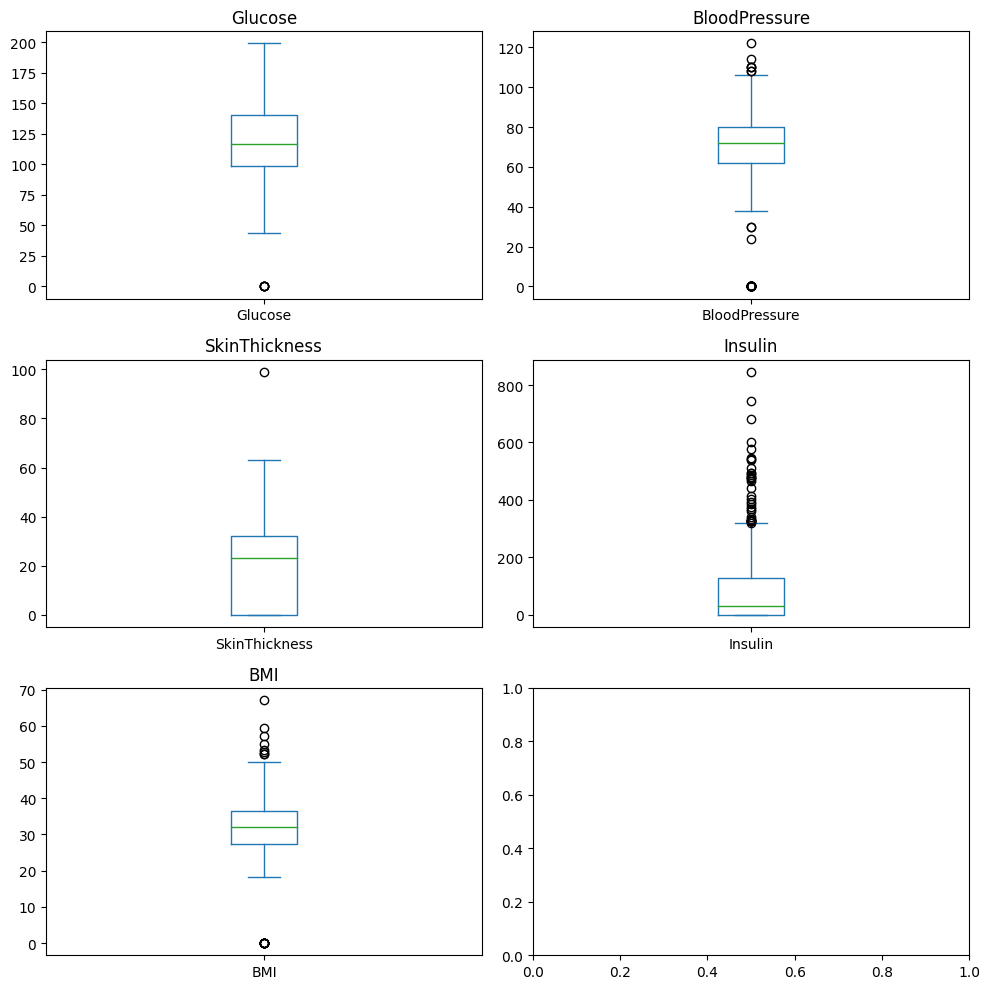

In [10]:
fig, ax = plt.subplots(3,2,figsize=(10,10))

zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

for i, zero in enumerate(zero_features):
    row = i //2
    col = i % 2
    diabetes_data[zero].plot(kind='box',ax= ax[row,col])
    ax[row,col].set_title(f'{zero}')

plt.tight_layout()
plt.show()

In [66]:
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']


def fill_zero (df, column):
    column_mean = df[column].mean()
    df[column].replace(0,column_mean,inplace=True)

for zero in zero_features:
    fill_zero(diabetes_data,zero)

<Axes: >

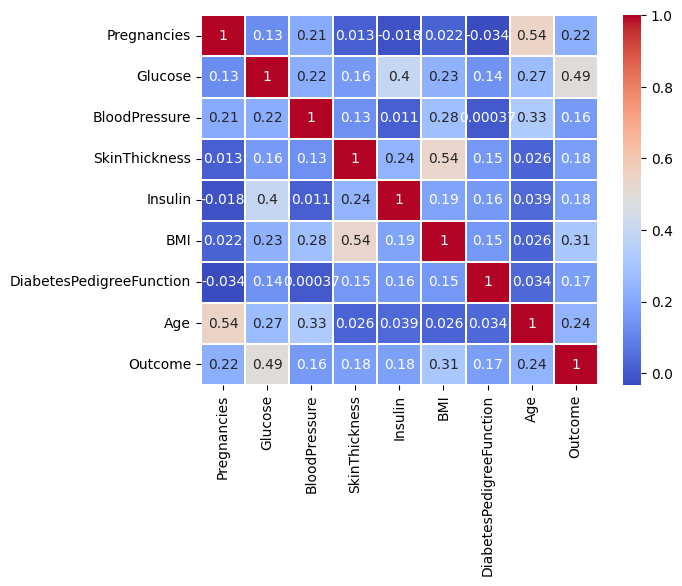

In [28]:
import seaborn as sns
sns.heatmap(diabetes_data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.2)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    cla_report = classification_report(y_test,y_pred)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_proba)

    print(f"Classification Report:\n {cla_report}")
    print(f'정확도 : {accuracy:.4f}')
    print(f"정밀도 :  {precision:.4f}")
    print(f"재현율 : {recall:.4f}")
    print(f"f1 스코어 : {f1:.4f}")
    print(f"Roc Auc : {roc_auc:.4f}")
    print()

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size =0.3, random_state=156, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

decision_tree_clf = DecisionTreeClassifier()
print(f"Decision Tree의 평가")
evaluate(decision_tree_clf, X_train, X_test, y_train, y_test)



random_forest_clf = RandomForestClassifier()
print(f"Random Forest의 평가")
evaluate(random_forest_clf, X_train, X_test, y_train, y_test)



logistic_regression_clf = LogisticRegression()
print(f"Logistic Regression의 평가")
evaluate(logistic_regression_clf, X_train, X_test, y_train, y_test)




xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=0.1, max_depth=5, n_estimators=200, use_label_encoder=False)
print("XGBoost Model")
evaluate(xgb_model, X_train, X_test, y_train, y_test)

Decision Tree의 평가
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       150
           1       0.59      0.54      0.56        81

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231

정확도 : 0.7056
정밀도 :  0.5867
재현율 : 0.5432
f1 스코어 : 0.5641
Roc Auc : 0.6683

Random Forest의 평가
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       150
           1       0.73      0.64      0.68        81

    accuracy                           0.79       231
   macro avg       0.78      0.76      0.76       231
weighted avg       0.79      0.79      0.79       231

정확도 : 0.7922
정밀도 :  0.7324
재현율 : 0.6420
f1 스코어 : 0.6842
Roc Auc : 0.8387

Logistic Regression의 평가
Classification Report:
               precision    recall  f1-score   support

           

(79,)


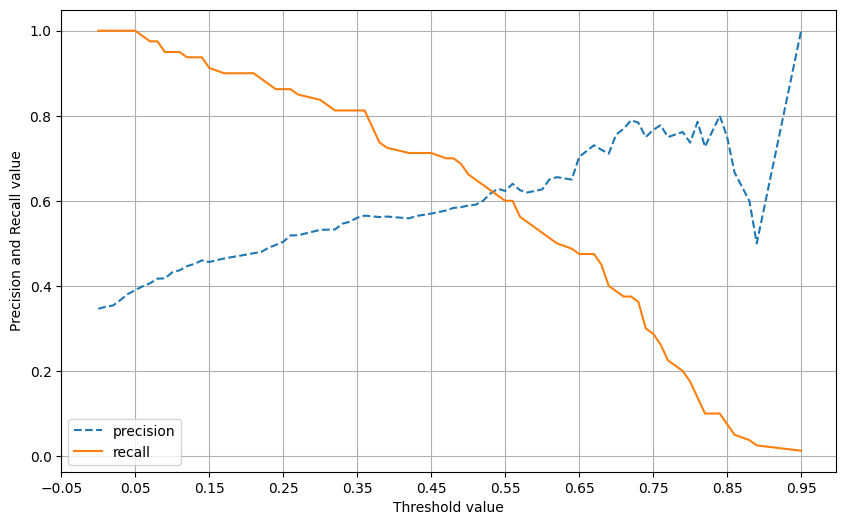

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
def curve_plot(y_test, y_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    print(thresholds.shape)
    threshold_boundary = thresholds.shape[0]
    plt.figure(figsize=(10,6))
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label ='recall')
    start, end = plt.xlim() # 플롯의 x축의 현재 한계를 반환
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    # x축, y축 label과 legend 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size =0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train,y_train)
y_pred = random_forest_clf.predict(X_test)
y_proba = random_forest_clf.predict_proba(X_test)[:,1]
curve_plot(y_test, y_proba)




In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

# 적용해볼 임계값 설정
custom_threshold = 0.5

# 임계값과 비교할 예측 확률값 준비
lr_clf = RandomForestClassifier()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_prob = lr_clf.predict_proba(X_test)
pred_prob_1 = pred_prob[:,1].reshape(-1,1) # pred_prob의 데이터프레임중 두번째 열(양성 클래스에 대한 확률값)만 사용

# Binarizier 클래스 사용
binarizer = Binarizer(threshold = custom_threshold).fit(pred_prob_1)
custom_predict = binarizer.transform(pred_prob_1)

# 점수 출력
print(precision_score(y_test, custom_predict))

0.6428571428571429


In [67]:
def evaluate(y_test,y_pred,y_proba):

    cla_report = classification_report(y_test,y_pred)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_proba)

    print(f"Classification Report:\n {cla_report}")
    print(f'정확도 : {accuracy:.4f}')
    print(f"정밀도 :  {precision:.4f}")
    print(f"재현율 : {recall:.4f}")
    print(f"f1 스코어 : {f1:.4f}")
    print(f"Roc Auc : {roc_auc:.4f}")
    print()


X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size =0.3, random_state=156, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


custom_threshold = 0.56

# 임계값과 비교할 예측 확률값 준비
lr_clf = RandomForestClassifier()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_prob = lr_clf.predict_proba(X_test)
pred_prob_1 = pred_prob[:,1].reshape(-1,1) # pred_prob의 데이터프레임중 두번째 열(양성 클래스에 대한 확률값)만 사용

# Binarizier 클래스 사용
binarizer = Binarizer(threshold = custom_threshold).fit(pred_prob_1)
custom_predict = binarizer.transform(pred_prob_1)
evaluate(y_test,pred,custom_predict)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       150
           1       0.72      0.63      0.67        81

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231

정확도 : 0.7835
정밀도 :  0.7183
재현율 : 0.6296
f1 스코어 : 0.6711
Roc Auc : 0.7083



In [68]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/diabetes.csv')

zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']


def fill_zero (df, column):
    column_mean = df[column].mean()
    df[column].replace(0,column_mean,inplace=True)

for zero in zero_features:
    fill_zero(diabetes_data,zero)

In [70]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [74]:
df = diabetes_data.copy()

In [ ]:
bins = [0,60,80,120,140]
labels=['low','low-mid','normal','high-mid']
df['BP_group'] = pd.cut(df['BloodPressure'],bins=bins,lables=labels)
df.drop('BloodPressure',)

In [77]:
268 / 768 * 100

34.89583333333333